<b>Исследование данных о пользователях</b>  
<u>Обзор и подготовка данных</u>

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
user_data = pd.read_csv(r'C:\Users\user\Desktop\practice\3_user_data.csv')
logs = pd.read_csv(r'C:\Users\user\Desktop\practice\3_logs.csv')
print('Пользователи:\n', user_data.head())
print('Логи:\n', logs.head())

Пользователи:
    client  premium  age
0   46346    False   58
1    4391    False   55
2   27372    False   64
3   11989    False   44
4   60664    False   49
Логи:
    client  success  platform        time
0   40177     True     phone  1585412212
1   61468     True     phone  1585425658
2   35604    False     phone  1585459894
3    9961     True     phone  1585400189
4   10931     True  computer  1585468629


Можно сразу заметить, что столбец time имеет не самый удобный для обработки формат. Далее рассмотрим основные характеристики датасетов.

In [126]:
print(user_data.info(),'\n')
print(logs.info())

<class 'pandas.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB
None 

<class 'pandas.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   client    4500 non-null   int64
 1   success   4500 non-null   bool 
 2   platform  4500 non-null   str  
 3   time      4500 non-null   int64
dtypes: bool(1), int64(2), str(1)
memory usage: 110.0 KB
None


<b>Выводы</b>  
Всего в таблице user_data 3 столбца и 2954 строки, типы данных - int64, bool.  
В таблице logs - 4 столбца и 4500 строк, типы данных - int64, bool, str.  
Описание данных:  
user_data:  
• client – идентификатор пользователя  
• premium – является ли клиент премиум  
• age – возраст  
logs:  
• client – идентификатор пользователя  
• success – результат (успех - 1, нет - 0)  
• platform – платформа  
• time – время в формате Unix  

В обеих таблицах отсутствуют пропуски в данных.

In [ ]:
logs.describe() # статистические характеристики датасета logs

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [ ]:
succ = logs.groupby(['client'], as_index=False) \
            .agg({'success': 'sum'}) \
            .sort_values(by = 'success', ascending=False)
max_succ = succ['success'].max() # находим значение максимального кол-ва успешных операций
succ = succ[succ.success == max_succ] \
       .client.sort_values() \
       .tolist() # запись id клиентов с max кол-вом успешных операций в виде списка
print(succ)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]


In [128]:
print(logs.platform.unique()) # уникальные значения в столбце platform
logs.groupby(['platform'], as_index=False) \
    .agg({'success': 'sum'}) \
    .sort_values(by = 'success', ascending=False) # количество успешных операций в разбивке по платформам

<StringArray>
['phone', 'computer', 'tablet']
Length: 3, dtype: str


,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [145]:
user_logs = logs.merge(user_data, on = 'client', how = 'inner')
user_logs.loc[user_logs.premium == True] \
            .platform.value_counts(normalize=True) \
            .round(2) # посчет % премиальных клиентов в разбивке по платформам

platform
phone       0.59
computer    0.36
tablet      0.06
Name: proportion, dtype: float64

<b>Выводы</b>  
Мобильные устройства (phone) доминируют — используются всеми клиентами чаще всего как при успешных операциях, так и премиум-пользователями в общем.

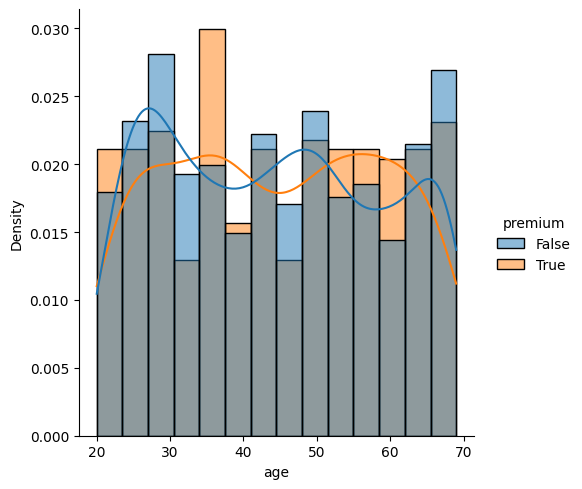

In [147]:
sns.displot(data = user_logs, x = 'age', hue = 'premium', kde = True, 
            kind = 'hist', stat = 'density', common_norm = False, bins = 14
            ) # распределение возраста в зависимости от типа клиента (премиум/нет)

<b>Выводы</b>  
Возраст большинства премиум-клиентов - молодые люди 35-ти лет и пользователи с возрастом 52-63 года.

<Axes: xlabel='successes', ylabel='count'>

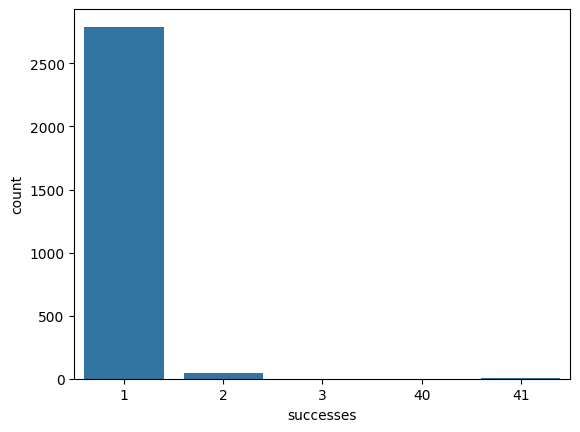

In [148]:
success_cnt = logs.query('success == True') \
                  .client.value_counts() \
                  .rename('successes')
sns.countplot(x = success_cnt)

<b>Выводы</b>  
Большинство клиентов сделали всего 1 успешную операцию, но также есть пользователи, у которых 41 успешная операция.

<Axes: xlabel='age', ylabel='count'>

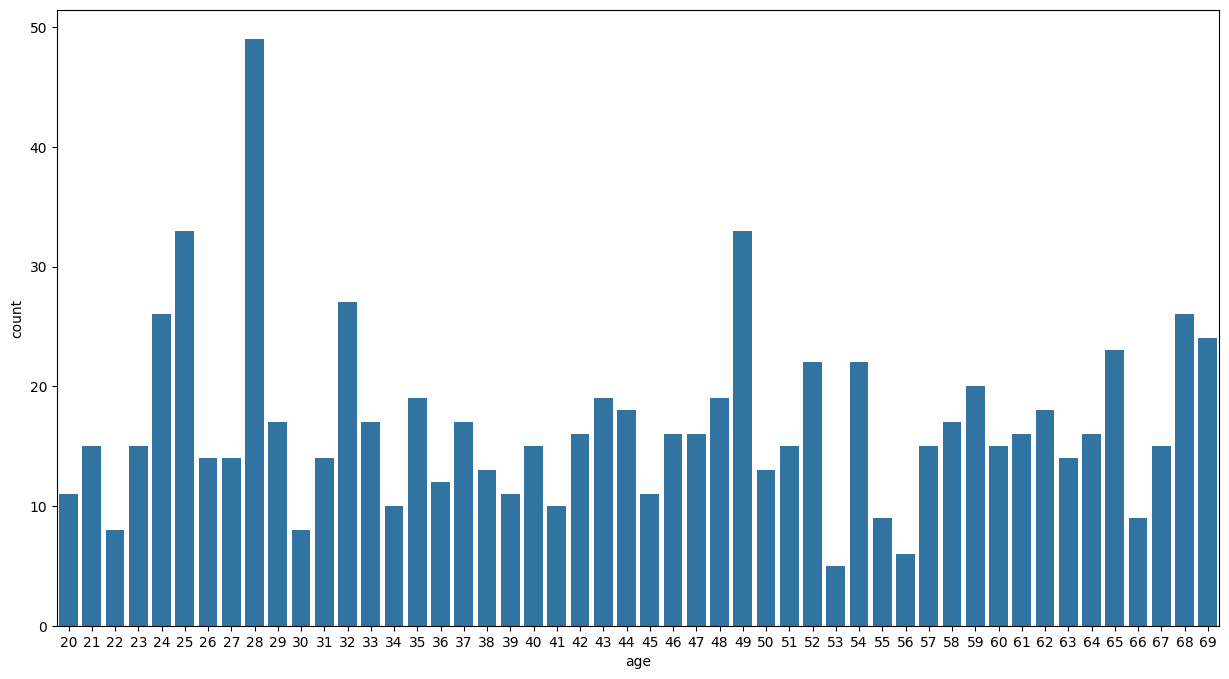

In [ ]:
success_cnt_comp = logs.loc[(logs.success == True) & (logs.platform == 'computer')]
mer_comp = user_data.merge(success_cnt_comp, on = 'client')
plt.figure(figsize = (15, 8)) # размер графика
sns.countplot(data = mer_comp, 
              x = 'age') # число успешных операций, сделанных на платформе computer, в зависимости от возраста

<b>Выводы</b>  
Пользователи, которым 28 лет совершили максимальное количество успешных операций. Минимальное количество - у 53-летних пользователей.